## Customer Segmentation Analysis Part 1

#### Q.  What is Customer Segmentation and why is it important from marketing perspective?

Market segmentation can help you to define and better understand your target audiences and ideal customers. This allows you to identify the right market for your products and then target your marketing more effectively. Similarly, you can make use of market segmentation to offer more precisely targeted advertising options and to customize their content for different audience groups. Customer segmentation is the action of breaking your customer base into groups depending on demographic, psychographic, etc. Using customer segmentation in marketing means that you can target the right people with the right messaging about your products. This will increase the success of your marketing campaigns. 

## Import Libraries and Data

In [1]:
# Import the appropriate Libraries
import pandas as pd # for dataframes
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
import datetime as dt
import numpy as np

# Check encoding in the dataset because if you load the dataset without encoding an error will occur

In [2]:
pip install chardet

Note: you may need to restart the kernel to use updated packages.


# import the chardet library and use the detect method to find the type of encoding

In [3]:
import chardet 

# 'rb' means read in the file as binary

In [4]:
with open("Sales_data.csv", 'rb') as file:
    print(chardet.detect(file.read()))

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


In [5]:
# Load the dataset
data = pd.read_csv('Sales_data.csv', encoding= 'ISO-8859-1')
# encoding='latin-1'

## Data Exploration

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
data.shape

(541909, 8)

In [8]:
data.Description.value_counts()

WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
                                      ... 
COUNTRY COTTAGE  DOORSTOP GREEN          1
Found in w/hse                           1
BLUE/NAT SHELL NECKLACE W PENDANT        1
sold with wrong barcode                  1
FLAMINGO LIGHTS                          1
Name: Description, Length: 4223, dtype: int64

## Data Preprocessing
- Remove Null Values
- Remove Duplicate Values

In [9]:
# Take all the rows where customer ID not equal to blank
data= data[pd.notnull(data['CustomerID'])]

In [10]:
data.shape

(406829, 8)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [12]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [13]:
# Removing duplicates
filtered_data=data[['Country','CustomerID']].drop_duplicates()

In [14]:
filtered_data.shape

(4380, 2)

In [15]:
filtered_data.head()

,Country,CustomerID
0,United Kingdom,17850.0
9,United Kingdom,13047.0
26,France,12583.0
46,United Kingdom,13748.0
65,United Kingdom,15100.0


In [16]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4380 entries, 0 to 541768
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     4380 non-null   object 
 1   CustomerID  4380 non-null   float64
dtypes: float64(1), object(1)
memory usage: 102.7+ KB


## Data Insights 
 - Top 10 country customer data 

In [17]:
# Check the country wise distribution
data.Country.value_counts()

United Kingdom          361878
Germany                   9495
France                    8491
EIRE                      7485
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1480
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     250
Unspecified                244
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45
Lithuani

In [18]:
filtered_data.Country.value_counts()[:10]


United Kingdom    3950
Germany             95
France              87
Spain               31
Belgium             25
Switzerland         21
Portugal            19
Italy               15
Finland             12
Austria             11
Name: Country, dtype: int64

<AxesSubplot:>

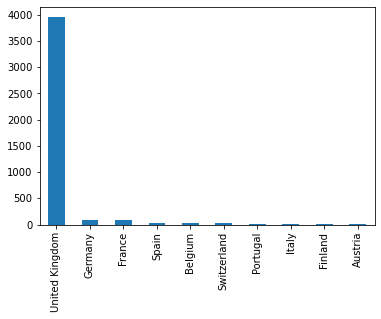

In [19]:
# Plot the data
filtered_data.Country.value_counts()[:10].plot(kind='bar')

####  Q. What do you observe?

From the above graph we can see that after removing duplicate data United Kingdom contains most of the data. Data from other countries is very less as compared to UK. Its better to work on data on one region whose data is appropraie while building the model.

In [20]:
## Filter data by the top most country
uk_data=data[data.Country=='United Kingdom']

In [21]:
uk_data.describe()

,Quantity,UnitPrice,CustomerID
count,361878.000000,361878.000000,361878.000000
mean,11.077029,3.256007,15547.871368
std,263.129266,70.654731,1594.402590
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,14194.000000
50%,4.000000,1.950000,15514.000000
75%,12.000000,3.750000,16931.000000
max,80995.000000,38970.000000,18287.000000


#### Q. What do you observe?  Which column needs special attention?

Quantity column requires special attention as there are values less than zero which is not possible. The column Quantity has a neagtive minimum value, in genral the quantity filed can never be negative or zero.Also there seems to be some outliers or we can say some people have bought more than other people as the maximum value in all three columns are much more than 75% quantile

In [22]:
uk_data = uk_data[(uk_data['Quantity'] > 0)]

In [23]:
uk_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354345 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    354345 non-null  object 
 1   StockCode    354345 non-null  object 
 2   Description  354345 non-null  object 
 3   Quantity     354345 non-null  int64  
 4   InvoiceDate  354345 non-null  object 
 5   UnitPrice    354345 non-null  float64
 6   CustomerID   354345 non-null  float64
 7   Country      354345 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 24.3+ MB


In [24]:
uk_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [25]:
# Filter the required columns only
uk_data=uk_data[['CustomerID','InvoiceDate','InvoiceNo','Quantity','UnitPrice']]

In [26]:
# Calculate Total Price
uk_data['TotalPrice'] = uk_data['Quantity'] * uk_data['UnitPrice']

##  Time frame of data

In [27]:
# Check Min and Max dates
print(uk_data['InvoiceDate'].min())
print(uk_data['InvoiceDate'].max())

1/10/2011 10:32
9/9/2011 9:52


#### Q. Comment on the above results.

The min and max functions obtain the index column for their operations, since InvoiceDate is not our index column. The results returned is incorrect.

## Perform RFM Analysis
- For Recency, Calculate the number of days between present date and date of last purchase for each customer.
- For Frequency, Calculate the number of orders for each customer.
- For Monetary, Calculate sum of purchase price for each customer

In [28]:
# Store a date as a reference point for recency calculations
PRESENT = dt.datetime(2011, 12, 10)

# Convert date to datetime format
uk_data['InvoiceDate'] = pd.to_datetime(uk_data['InvoiceDate'])

In [29]:
# Check Min and Max dates
print(uk_data['InvoiceDate'].min())
print(uk_data['InvoiceDate'].max())

2010-12-01 08:26:00
2011-12-09 12:49:00


In [30]:
uk_data['InvoiceDate'].head()

0   2010-12-01 08:26:00
1   2010-12-01 08:26:00
2   2010-12-01 08:26:00
3   2010-12-01 08:26:00
4   2010-12-01 08:26:00
Name: InvoiceDate, dtype: datetime64[ns]

In [31]:
uk_data['InvoiceNo'].value_counts().head()

576339    542
579196    533
580727    529
578270    442
573576    435
Name: InvoiceNo, dtype: int64

#### Q. Comment on the above results

The above code gives us the total count of each InvoiceNo in descending order. The minminum Invoice date is "2010-12-01 08:26:00" and maximum invoice date is "2011-12-09 12:49:00". Also we can see that invoice number 576339 has made purchase 542 times and similarly there are other invoice numbers who made multiple purchases.

In [32]:
orders = uk_data.groupby(['InvoiceNo', 'InvoiceDate', 'CustomerID']).agg({'TotalPrice': lambda x: x.sum()}).reset_index()
orders.head()

,InvoiceNo,InvoiceDate,CustomerID,TotalPrice
0,536365,2010-12-01 08:26:00,17850.0,139.12
1,536366,2010-12-01 08:28:00,17850.0,22.20
2,536367,2010-12-01 08:34:00,13047.0,278.73
3,536368,2010-12-01 08:34:00,13047.0,70.05
4,536369,2010-12-01 08:35:00,13047.0,17.85


In [33]:
rfm= uk_data.groupby('CustomerID').agg({'InvoiceDate': lambda date: (PRESENT - date.max()).days,
                                        'InvoiceNo': lambda num: len(num),
                                        'TotalPrice': lambda price: price.sum()})

In [34]:
rfm

,InvoiceDate,InvoiceNo,TotalPrice
CustomerID,,,
12346.0,325,1,77183.60
12747.0,2,103,4196.01
12748.0,0,4596,33719.73
12749.0,3,199,4090.88
12820.0,3,59,942.34
...,...,...,...
18280.0,277,10,180.60
18281.0,180,7,80.82
18282.0,7,12,178.05


In [35]:
# Rename the columns 
rfm.columns=['monetary','frequency','recency']

In [36]:
rfm['recency'] = rfm['recency'].astype(int)

In [37]:
rfm['monetary'] = rfm['monetary'].astype(int)

In [38]:
rfm.head()

,monetary,frequency,recency
CustomerID,,,
12346.0,325,1,77183
12747.0,2,103,4196
12748.0,0,4596,33719
12749.0,3,199,4090
12820.0,3,59,942


####  Q. What is wrong with this table       think ??

The column names are not are in the right order, InvoiceDate corresponds to recency, InvoiceNo corresponds to frequency and Total Price corresponds to monetary.

In [39]:
# Change the column names
rfm.columns=['recency','frequency','monetary']

##  Create Visuals
- Histogram for Recency Data
- Histogram for Frequency Data
- Histogram for Monetary Data


array([[<AxesSubplot:title={'center':'recency'}>]], dtype=object)

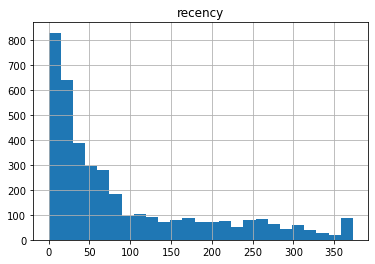

In [40]:
# Histogram for Recency Data (UK)
rfm.hist(column='recency', bins=25)

####  Q. What does this above chart tell ?

Recency tells us how recently a customer has made a purchase. With the above histogram we can observe that most of the cutomers has a recency between 0-50. There are high number of customers with recency of 0 the peak is around zero which is considered good as regular customers keeps coming back to purchase. 

array([[<AxesSubplot:title={'center':'frequency'}>]], dtype=object)

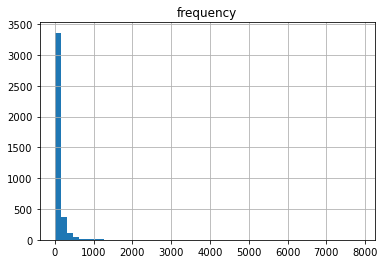

In [41]:
# Histogram for Frequency Data (UK)
rfm.hist(column='frequency', bins=50)

####  Q. What does this above chart tell ?

Frequency tells us the number of times an individual consumer has made a purchase. With the above histogram we can observe that most of the customers have frequency between 0-1000. There are high number of customers with frequency equal to 1, which means there are lot more one time purchase.

array([[<AxesSubplot:title={'center':'monetary'}>]], dtype=object)

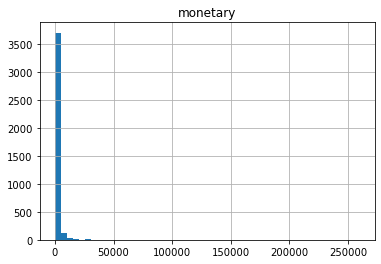

In [42]:
# Histogram for Monetary Data (UK)
rfm.hist(column='monetary', bins=50)

rfm.sort_values(by=['monetary'], inplace=True)

rfm = rfm[rfm.monetary <10000]

rfm.tail(100)

# Histogram for Monetary Data (UK)
rfm.hist(column='monetary', bins=100)

####  Q. What does this above chart tell ?

Monetary tells us the total money spent by a customer, in the above graph we can observe that there are more customers who spent less than 10000 on their bill. There are very few customers who spent above 10000 on their bill.

In [43]:
# Calculate Z scores to normalize the data
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(rfm))
print(z)

[[2.34412669e+00 4.10395112e-01 1.00681678e+01]
 [9.01587778e-01 5.79924468e-02 3.11801579e-01]
 [9.21685081e-01 2.06900052e+01 4.25821942e+00]
 ...
 [8.51344520e-01 3.59882729e-01 2.25295154e-01]
 [8.91539127e-01 3.05659123e+00 3.08216554e-02]
 [4.99641715e-01 9.35447047e-02 3.53221728e-03]]


In [44]:
# Save the cleaned file
rfm.to_csv('rfm.csv')

## Calcualte the RFM Score 

In [45]:
# Use quintiles to to make 5 equal parts based on the available values. Each quintiles contains 20% of the population. 
quintiles = rfm[['recency', 'frequency', 'monetary']].quantile([.2, .4, .6, .8]).to_dict()
quintiles

{'recency': {0.2: 12.0, 0.4: 32.0, 0.6: 71.0, 0.8: 178.0},
 'frequency': {0.2: 13.0, 0.4: 29.0, 0.6: 58.0, 0.8: 120.0},
 'monetary': {0.2: 241.0, 0.4: 465.0, 0.6: 897.0, 0.8: 1957.0}}

In [46]:

# Define functions to assign ranks from 1 to 5. 
# A lower Recency value is better and higher Frequency and Monetary values are better. 
# We will have to write two separate functions

In [47]:
def r_score(x):
    if x <= quintiles['recency'][.2]:
        return 5
    elif x <= quintiles['recency'][.4]:
        return 4
    elif x <= quintiles['recency'][.6]:
        return 3
    elif x <= quintiles['recency'][.8]:
        return 2
    else:
        return 1
    
def fm_score(x, c):
    if x <= quintiles[c][.2]:
        return 1
    elif x <= quintiles[c][.4]:
        return 2
    elif x <= quintiles[c][.6]:
        return 3
    elif x <= quintiles[c][.8]:
        return 4
    else:
        return 5  

In [48]:
# Calculate RFM score for each customer

rfm['R'] = rfm['recency'].apply(lambda x: r_score(x))
rfm['F'] = rfm['frequency'].apply(lambda x: fm_score(x, 'frequency'))
rfm['M'] = rfm['monetary'].apply(lambda x: fm_score(x, 'monetary'))

In [49]:
# Combine the scores
rfm['RFM Score'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str)
rfm.head()

,recency,frequency,monetary,R,F,M,RFM Score
CustomerID,,,,,,,
12346.0,325,1,77183,1,1,5,115
12747.0,2,103,4196,5,4,5,545
12748.0,0,4596,33719,5,5,5,555
12749.0,3,199,4090,5,5,5,555
12820.0,3,59,942,5,4,4,544


In [50]:
# Create the customer segments based on your knowledge. 
# Create 6 segments based on R and F scores

segments = {
    '[1-2][1-4]': 'at risk',
    '[1-2]5': 'can\'t loose',
    '3[1-3]': 'needs attention',
    '[3-4][4-5]': 'loyal customers',
    '[4-5]1': 'new customers',
    '[4-5][2-5]': 'champions'
    
}

rfm['Segment'] = rfm['R'].map(str) + rfm['F'].map(str)
rfm['Segment'] = rfm['Segment'].replace(segments, regex=True)
rfm.head()

,recency,frequency,monetary,R,F,M,RFM Score,Segment
CustomerID,,,,,,,,
12346.0,325,1,77183,1,1,5,115,at risk
12747.0,2,103,4196,5,4,5,545,champions
12748.0,0,4596,33719,5,5,5,555,champions
12749.0,3,199,4090,5,5,5,555,champions
12820.0,3,59,942,5,4,4,544,champions


In [51]:
# count the number of customers in each segment
segments_counts = rfm['Segment'].value_counts().sort_values(ascending=True)

segments_counts

can't loose          74
new customers       146
needs attention     486
loyal customers     722
champions          1012
at risk            1481
Name: Segment, dtype: int64

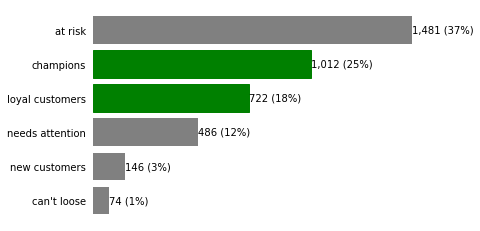

In [52]:
# Distribution of Segments
fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='gray')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['champions', 'loyal customers']:
            bar.set_color('green')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()

#### Q. Comment on the above chart

The above chart shows us the distribution of the customers based on thier RFM scores. The customers are segmented based on thier RMF score, which helps us to understand which customers are likely to churn or stay. The chart also tells us who are loyal customers and champions or who are new customers and who are the cutomers the company cant loose. \
We can point out from the above graph that store has 33% loyal customers. Also there are high number of customers who are at risk of loss because they havent purchased recently. So store should provide discount schemes to these customers to attract them. Also Store has 6% new customers and similarly store should provide them schemes to reatin them and turn them into loyal customers. 

#### Q. Who are the best customers?

With the analysis of the above chart we can say that the cutomers who fall into Champions and loyal customers segments are the best customers.

In [53]:
rfm[rfm['RFM Score']=='555'].sort_values('monetary', ascending=False).head()

,recency,frequency,monetary,R,F,M,RFM Score,Segment
CustomerID,,,,,,,,
18102.0,0,431,259657,5,5,5,555,champions
17450.0,8,337,194550,5,5,5,555,champions
17511.0,2,963,91062,5,5,5,555,champions
16684.0,4,277,66653,5,5,5,555,champions
14096.0,4,5111,65164,5,5,5,555,champions


#### Q. Which customers are likely to churn?

The distribution of the cusotmers to differnet segments chart can tell us that the customers who are segmented to new customers, can't loose and at risk and the customers how are most likely to churn.

In [54]:
#Customers who's recency value is low

rfm[rfm['R'] <= 1 ].sort_values('monetary', ascending=False).head()

,recency,frequency,monetary,R,F,M,RFM Score,Segment
CustomerID,,,,,,,,
12346.0,325,1,77183,1,1,5,115,at risk
15749.0,235,10,44534,1,1,5,115,at risk
15098.0,182,3,39916,1,1,5,115,at risk
13093.0,275,159,7832,1,5,5,155,can't loose
17850.0,372,297,5391,1,5,5,155,can't loose


#### Q. Which customers we are going to loose?

The customers who are segmented to at risk are the customers we are going to loose.

In [55]:
#Customers who's recency, frequency and monetary values are low 

rfm[rfm['RFM Score']=='111'].sort_values('recency',ascending=False).head()

,recency,frequency,monetary,R,F,M,RFM Score,Segment
CustomerID,,,,,,,,
13747.0,373,1,79,1,1,1,111,at risk
14237.0,373,9,161,1,1,1,111,at risk
17643.0,373,8,101,1,1,1,111,at risk
15350.0,373,5,115,1,1,1,111,at risk
13011.0,372,3,50,1,1,1,111,at risk


#### Q. Who are the loyal customers?

The customers having a high frequency value are segmented to be a loyal customer.

In [56]:
#Customers with high frequency value

rfm[rfm['F'] >= 3 ].sort_values('monetary', ascending=False).head()

,recency,frequency,monetary,R,F,M,RFM Score,Segment
CustomerID,,,,,,,,
18102.0,0,431,259657,5,5,5,555,champions
17450.0,8,337,194550,5,5,5,555,champions
17511.0,2,963,91062,5,5,5,555,champions
16029.0,38,242,81024,3,5,5,355,loyal customers
16684.0,4,277,66653,5,5,5,555,champions


## Calculate RFM scores using 4 quintiles instead of 5 and answer all the questions again
- Make sure you give proper names to the segments. Please create 4 segments based on R and F scores instead of 6


In [57]:
# Use quintiles to to make 5 equal parts based on the available values. Each quintiles contains 20% of the population. 
quintiles2 = rfm[['recency', 'frequency', 'monetary']].quantile([.3, .6, .9]).to_dict()
quintiles2

{'recency': {0.3: 22.0, 0.6: 71.0, 0.9: 261.0},
 'frequency': {0.3: 20.0, 0.6: 58.0, 0.9: 206.0},
 'monetary': {0.3: 336.0, 0.6: 897.0, 0.9: 3432.0}}

In [58]:
def r_score2(x):
    if x <= quintiles2['recency'][.3]:
        return 4
    elif x <= quintiles2['recency'][.6]:
        return 3
    elif x <= quintiles2['recency'][.9]:
        return 2
    else:
        return 1
    
def fm_score2(x, c):
    if x <= quintiles2[c][.3]:
        return 1
    elif x <= quintiles2[c][.6]:
        return 2
    elif x <= quintiles2[c][.9]:
        return 3
    else:
        return 4  

In [59]:
# Calculate RFM score for each customer

rfm['R2'] = rfm['recency'].apply(lambda x: r_score2(x))
rfm['F2'] = rfm['frequency'].apply(lambda x: fm_score2(x, 'frequency'))
rfm['M2'] = rfm['monetary'].apply(lambda x: fm_score2(x, 'monetary'))

In [60]:
# Combine the scores
rfm['RFM Score2'] = rfm['R2'].map(str) + rfm['F2'].map(str) + rfm['M2'].map(str)
rfm.head()

,recency,frequency,monetary,R,F,M,RFM Score,Segment,R2,F2,M2,RFM Score2
CustomerID,,,,,,,,,,,,
12346.0,325,1,77183,1,1,5,115,at risk,1,1,4,114
12747.0,2,103,4196,5,4,5,545,champions,4,3,4,434
12748.0,0,4596,33719,5,5,5,555,champions,4,4,4,444
12749.0,3,199,4090,5,5,5,555,champions,4,3,4,434
12820.0,3,59,942,5,4,4,544,champions,4,3,3,433


In [61]:
# Create the customer segments based on your knowledge. 
# Create 6 segments based on R and F scores

segments2 = {
    '[1-2][1-4]': 'at risk',
    '[1-2]4': 'About to Sleep',
    '3[2-4]': 'Can be Promising',
    '[3-4][3-4]': 'loyal customers',
    '[1-4]1': 'new customers',
    '[3-4][2-4]': 'champions'
    
}

rfm['Segment2'] = rfm['R2'].map(str) + rfm['F2'].map(str)
rfm['Segment2'] = rfm['Segment2'].replace(segments2, regex=True)
rfm.head()

,recency,frequency,monetary,R,F,M,RFM Score,Segment,R2,F2,M2,RFM Score2,Segment2
CustomerID,,,,,,,,,,,,,
12346.0,325,1,77183,1,1,5,115,at risk,1,1,4,114,at risk
12747.0,2,103,4196,5,4,5,545,champions,4,3,4,434,loyal customers
12748.0,0,4596,33719,5,5,5,555,champions,4,4,4,444,loyal customers
12749.0,3,199,4090,5,5,5,555,champions,4,3,4,434,loyal customers
12820.0,3,59,942,5,4,4,544,champions,4,3,3,433,loyal customers


In [62]:
# count the number of customers in each segment
segments_counts2 = rfm['Segment2'].value_counts().sort_values(ascending=True)

segments_counts2

champions            261
new customers        439
loyal customers      777
Can be Promising     889
at risk             1555
Name: Segment2, dtype: int64

## Can you create segments based on F and M scores. This is an extra exercise for groups who want to try more. It is not mandatory.

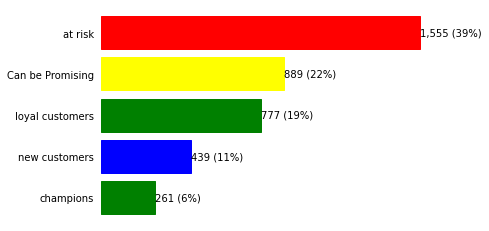

In [63]:
# Distribution of Segments
fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts2)),
              segments_counts2,
              color='gray')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts2)))
ax.set_yticklabels(segments_counts2.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts2.index[i] in ['champions', 'loyal customers']:
            bar.set_color('green')
        if segments_counts2.index[i] in ['Can be Promising']:
            bar.set_color('yellow')
        if segments_counts2.index[i] in ['at risk']:
            bar.set_color('red')
        if segments_counts2.index[i] in ['new customers']:
            bar.set_color('blue')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts2.sum())),
                va='center',
                ha='left'
               )

plt.show()

## Customer Segmentation Analysis Part 2

In [64]:
# Import the appropriate Libraries
import pandas as pd # for dataframes
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
import datetime as dt
import numpy as np

In [65]:
# Load rfm data from Part 1
rfm = pd.read_csv('rfm.csv', index_col ='CustomerID')

In [66]:
rfm.head()

,recency,frequency,monetary
CustomerID,,,
12346.0,325,1,77183
12747.0,2,103,4196
12748.0,0,4596,33719
12749.0,3,199,4090
12820.0,3,59,942


<AxesSubplot:>

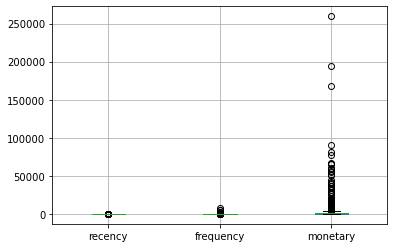

In [67]:
# Create box plots to check for outliers
rfm.boxplot()

In [68]:
# Calculate Z scores to normalize the data
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(rfm))
print(z)

[[2.34412669e+00 4.10395112e-01 1.00681678e+01]
 [9.01587778e-01 5.79924468e-02 3.11801579e-01]
 [9.21685081e-01 2.06900052e+01 4.25821942e+00]
 ...
 [8.51344520e-01 3.59882729e-01 2.25295154e-01]
 [8.91539127e-01 3.05659123e+00 3.08216554e-02]
 [4.99641715e-01 9.35447047e-02 3.53221728e-03]]


In [69]:
rfm_clean = rfm[(z < 3).all(axis=1)]

### Q. What is the purpose of the above code

The purpose of converting the rfm raw score is to normalize the data using Zscore, we do it to decrease variation and convert data into normal range, Z-scores also make it possible to adapt scores from features to make scores that can be compared to one another more accurately.

In [70]:
rfm.shape

(3921, 3)

In [71]:
rfm_clean.shape

(3868, 3)

### Q. Create box plot to check for outliers with the cleaned data and comment on it. Compare it with the previous box plot.

<AxesSubplot:>

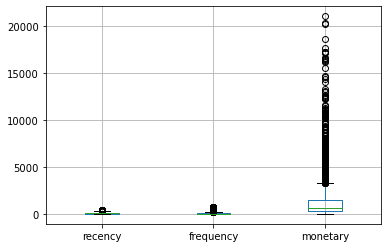

In [72]:
rfm_clean.boxplot()

After the data is cleaned, we see that the range has been decreased from 250000 to 20000. The outliers can be easily determined after the data is cleaned, outliers for monetary starts from around 4000 and outliers for recency starts from 1000. We can see the spread of the variables better compared to the previous plot, where as the spread was not visible in the previous plot.

### Q. Create the Histogram for R, F, and M for the cleaned data. Comment on them and compare them with the previous histograms

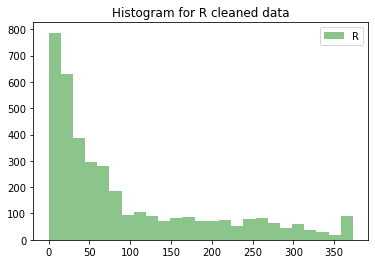

In [73]:
plt.hist(rfm_clean['recency'], bins=25, alpha=0.45, color='green') 
plt.title("Histogram for R cleaned data")
  
plt.legend(['R'])
  
plt.show()

The histogram plot for recency variable is right skewed and has a unimodal distribution. We can see high customers with recency score between 0-50 and the count decreases as the score increases.

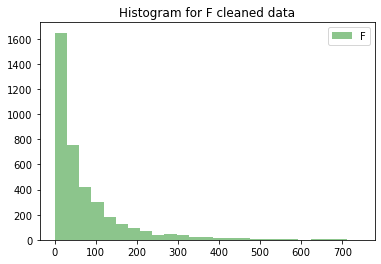

In [74]:
plt.hist(rfm_clean['frequency'], bins=25, alpha=0.45, color='green') 
plt.title("Histogram for F cleaned data")
  
plt.legend(['F'])
  
plt.show()

The histogram plot for frequency variable is right skewed and has a unimodal distribution. We can see high customers frequency score between 0-100 and the count decreses as the score increases.

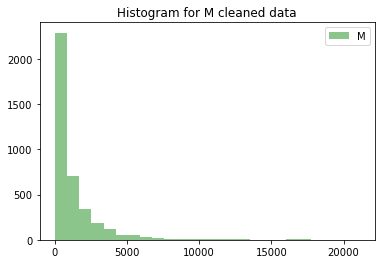

In [75]:
plt.hist(rfm_clean['monetary'], bins=25, alpha=0.45, color='green') 
plt.title("Histogram for M cleaned data")
  
plt.legend(['M'])
  
plt.show()

The histogram plot for monetary variable is right skewed and has a unimodal distribution. We can see high customers monetray score between 0-1000 and the count decreses as the score increases.

## Perform cluster analysis using K-means clustering with the original rfm dataframe

In [76]:
X = rfm

In [77]:
X.head()

,recency,frequency,monetary
CustomerID,,,
12346.0,325,1,77183
12747.0,2,103,4196
12748.0,0,4596,33719
12749.0,3,199,4090
12820.0,3,59,942


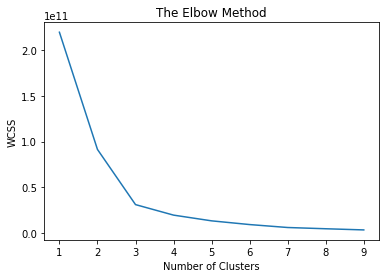

In [78]:
# Choose number of Clusters using the elbow method
# Within cluster sum of squares (wcss)
from sklearn.cluster import KMeans
# start with 10 number of clusters
wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters =i, init = 'k-means++', max_iter =300, n_init =10, random_state =0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [79]:
# Fitting K Means to the Datatset using k = 3

kmeans = KMeans(n_clusters = 3)
y_kmeans = kmeans.fit_predict(X)


In [80]:
y_kmeans

array([2, 0, 2, ..., 0, 0, 0])

In [81]:
# Adding cluster ID to the dataframe
rfm['Cluster_ID'] = y_kmeans

In [82]:
rfm.head()

,recency,frequency,monetary,Cluster_ID
CustomerID,,,,
12346.0,325,1,77183,2
12747.0,2,103,4196,0
12748.0,0,4596,33719,2
12749.0,3,199,4090,0
12820.0,3,59,942,0


## Plot the graphs

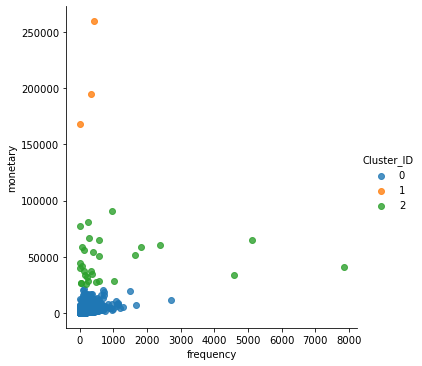

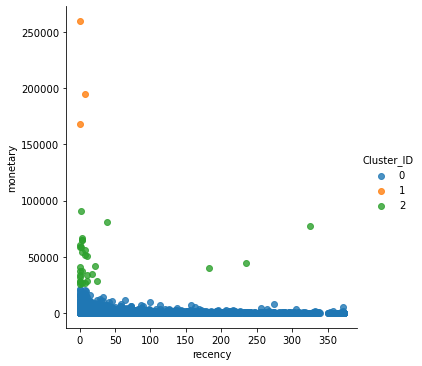

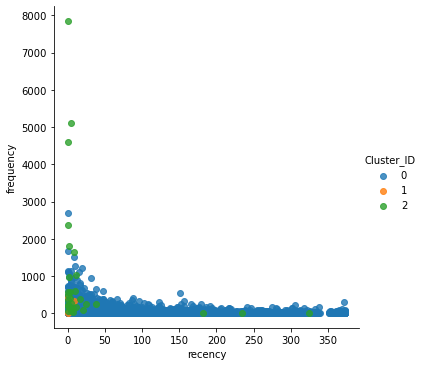

In [83]:
# Create a plot for frequency vs monetary 
facet = sns.lmplot(data=X, x='frequency', y='monetary', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)
# Create a plot for recency vs monetary
facet2 = sns.lmplot(data=X, x='recency', y='monetary', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)
# Create a plot for recency vs frequency
facet2 = sns.lmplot(data=X, x='recency', y='frequency', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)

### Q. Comment on the plots

##### Plot for frequency vs monetary 
Cluster_ID 0: The k Means model classifies or clusters the lower level of monetary(0-25000) and frequency(0-1000) values. \
Cluster_ID 1: The k Means model classifies or clusters the monetary between 150000-300000 and frequency between 0-1000 \
Cluster_ID 2: The k Means model classifies or clusters the monetary between 25000-50000 and frequency between 0-8000.

##### Plot for recency vs monetary 
Cluster_ID 0: The k Means model classifies or clusters the monetary(0-25000) and recency(0-350) values. \
Cluster_ID 1: The k Means model classifies or clusters the monetary between 150000-300000 and recency between 0-50 \
Cluster_ID 2: The k Means model classifies or clusters the monetary between 50000-100000 and frequency between 0-350 .

##### Plot for recency vs frequency 
All the clusters are clustering the lowers values of the recency and monetry values, however the cluster_ID 2 is also clustering the higher value of frequency scores.

### Q. Perform Cluster Analysis with k=4

In [84]:
X1 = rfm_clean

### Q. Perform cluster analysis with the outliers removed rfm dataframe. Follow exactly the same steps including the elbow method and plot the graphs and comment on the plots. You decide what k value you should use.

# Calculate mean for every cluster 
for i in range(4):
    rfm_clean_mean= rfm_clean.groupby(['Cluster_ID']).mean()

rfm_clean_mean

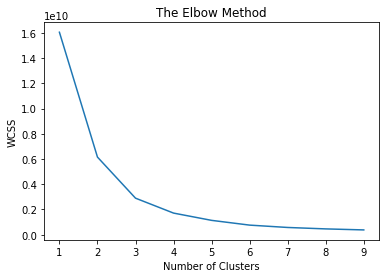

In [85]:
from sklearn.cluster import KMeans
# start with 10 number of clusters
wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters =i, init = 'k-means++', max_iter =300, n_init =10, random_state =0)
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [86]:
kmeans = KMeans(n_clusters = 3)
y_kmeans = kmeans.fit_predict(X1)

In [87]:
# Adding cluster ID to the dataframe
rfm_clean['Cluster_ID'] = y_kmeans

<ipython-input-87-1675166c0176>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_clean['Cluster_ID'] = y_kmeans


In [88]:
rfm_clean.head(5)

,recency,frequency,monetary,Cluster_ID
CustomerID,,,,
12747.0,2,103,4196,0
12749.0,3,199,4090,0
12820.0,3,59,942,1
12821.0,214,6,92,1
12822.0,70,46,948,1


In [89]:
for i in range(4): 
  rfm_clean_mean= rfm_clean.groupby(['Cluster_ID']).mean()

rfm_clean_mean

,recency,frequency,monetary
Cluster_ID,,,
0,31.801085,207.039783,3757.645570
1,104.938291,50.234804,668.113854
2,11.432432,309.513514,12022.202703


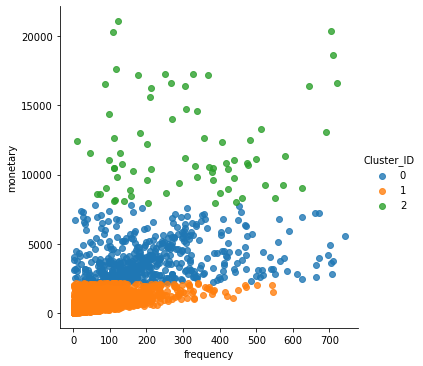

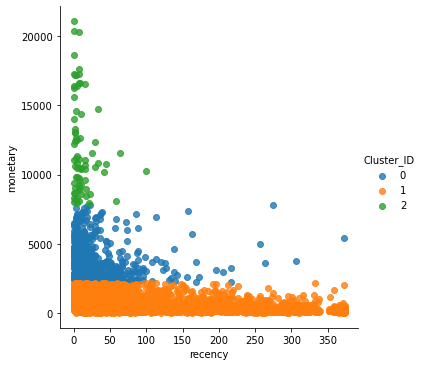

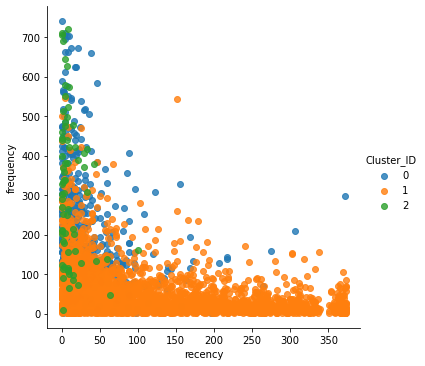

In [90]:
# Create a plot for frequency vs monetary 
facet = sns.lmplot(data=X1, x='frequency', y='monetary', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)
# Create a plot for recency vs monetary
facet2 = sns.lmplot(data=X1, x='recency', y='monetary', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)
# Create a plot for recency vs frequency
facet2 = sns.lmplot(data=X1, x='recency', y='frequency', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)

##### Plot for frequency vs monetary
Cluster_ID 0: The k Means model classifies or clusters the monetary between 2500-7500 and for all values of frequency. 
Cluster_ID 1: The k Means model classifies or clusters the monetary anything above 7500 and for all values of frequency.
Cluster_ID 2: The k Means model classifies or clusters the monetary anytihng below 2500 and for all values of frequency.

##### Plot for recency vs monetary
Cluster_ID 0: The k Means model classifies or clusters the monetary between 2500-7500 and for all values of recency. 
Cluster_ID 1: The k Means model classifies or clusters the monetary anything above 7500 and for recency between 0-150.
Cluster_ID 2:The k Means model classifies or clusters the monetary anytihng below 2500 and for all values of recency.

##### Plot for recency vs frequency
All the clusters are clustering most of the values for recency and frequency, there is no huge difference in the classification made by each clusters.

In [91]:
for i in range(4): 
  rfm_clean_mean= rfm_clean.groupby(['Cluster_ID']).mean()

rfm_clean_mean

,recency,frequency,monetary
Cluster_ID,,,
0,31.801085,207.039783,3757.645570
1,104.938291,50.234804,668.113854
2,11.432432,309.513514,12022.202703


## Perform cluster analysis using hierarchical clustering with the cleaned rfm dataframe

In [92]:
# Import the libraries
import scipy.cluster.hierarchy as sch

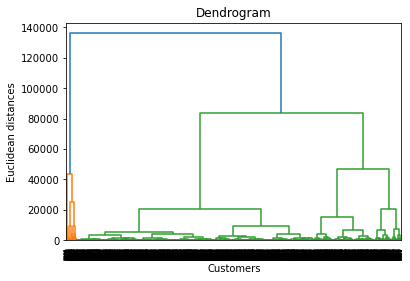

In [93]:
# Build a dendrogram using the minimum variance method
dendrogram = sch.dendrogram(sch.linkage(X1, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

## Identify the clusters based on dendrogram

In [94]:
# Train the hierarchical clustering model on the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X1)

In [95]:
X1['Cluster_ID'] = y_hc

<ipython-input-95-343db62683d0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X1['Cluster_ID'] = y_hc


In [96]:
X1.head()

,recency,frequency,monetary,Cluster_ID
CustomerID,,,,
12747.0,2,103,4196,0
12749.0,3,199,4090,0
12820.0,3,59,942,0
12821.0,214,6,92,0
12822.0,70,46,948,0


### Q. Create all the three plots again. Do you observe any differences from k-means clustering method

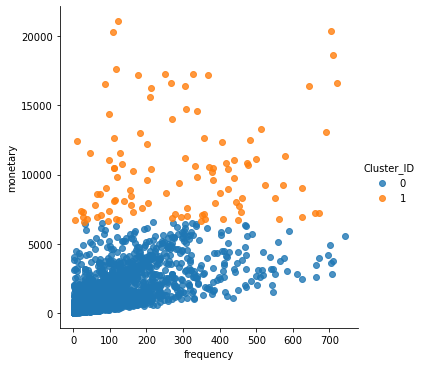

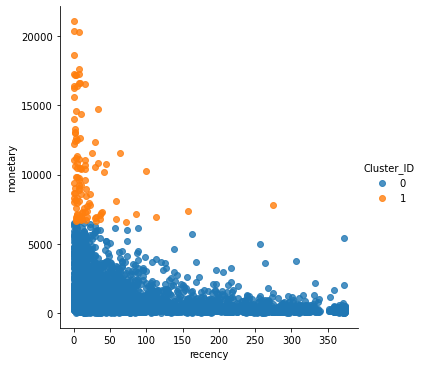

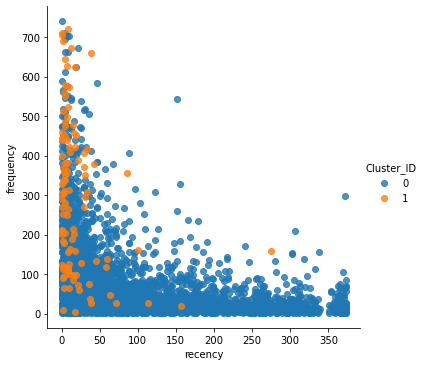

In [97]:
# Create a plot for frequency vs monetary 
facet = sns.lmplot(data=X1, x='frequency', y='monetary', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)
# Create a plot for recency vs monetary
facet2 = sns.lmplot(data=X1, x='recency', y='monetary', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)
# Create a plot for recency vs frequency
facet2 = sns.lmplot(data=X1, x='recency', y='frequency', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)

In the Agglomerative Clustering we are perfomring clustering of 2, however in the k Means clustering we are performing clustering of 3. Some of the scores are shared between the Cluster_ID 0 and Cluster_ID 1 in the Agglomerative clustering compared to the K Means Clustering. 

## Evaluate Clustering 

In [98]:
# Import libraries
from sklearn import cluster
from sklearn import metrics

In [99]:
# Calculate Silhouette score for different cluster values
krange = list(range(2,5))
avg_silhouettes = []
for n in krange:
  model = cluster.KMeans(n_clusters=n, random_state=10)
  cluster_assignments = model.fit_predict(X1)

  silhouette_avg = metrics.silhouette_score(X1, cluster_assignments)
  avg_silhouettes.append(silhouette_avg)

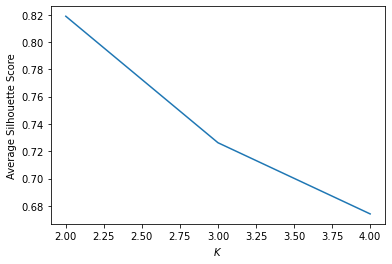

In [100]:
# PLot the score
plt.plot(krange, avg_silhouettes)
plt.xlabel("$K$")
plt.ylabel("Average Silhouette Score")
plt.show()